In [2]:
!pip install statsmodels

     ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
     ------- -------------------------------- 1.6/9.2 MB 50.9 MB/s eta 0:00:01
     ---------------------------- ----------- 6.4/9.2 MB 81.3 MB/s eta 0:00:01
     ---------------------------------------- 9.2/9.2 MB 73.2 MB/s eta 0:00:00
     ---------------------------------------- 0.0/42.5 MB ? eta -:--:--
     ---- ---------------------------------- 4.9/42.5 MB 104.6 MB/s eta 0:00:01
     --------- ---------------------------- 10.2/42.5 MB 108.8 MB/s eta 0:00:01
     ------------- ------------------------ 14.7/42.5 MB 108.8 MB/s eta 0:00:01
     ----------------- -------------------- 20.1/42.5 MB 108.8 MB/s eta 0:00:01
     ---------------------- --------------- 25.5/42.5 MB 108.8 MB/s eta 0:00:01
     --------------------------- ---------- 30.6/42.5 MB 131.2 MB/s eta 0:00:01
     ------------------------------- ------ 35.6/42.5 MB 108.8 MB/s eta 0:00:01
     --------------------------------- ----- 37.0/42.5 MB 81

In [4]:
!pip install seaborn

     ---------------------------------------- 0.0/293.3 kB ? eta -:--:--
     ---------------------------------------- 293.3/293.3 kB ? eta 0:00:00


In [5]:
import statsmodels as ss # 통계 관련해서 많이 씀
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## 정상성을 가진 데이터
- 정상성한 임의의 데이터 만들기

In [6]:
np.random.seed(1004)

x = np.arange(1000)
y = np.random.normal(size = len(x))

In [7]:
print(y)

[ 5.94403067e-01  4.02608709e-01 -8.05162234e-01  1.15125696e-01
 -7.53065220e-01 -7.84117801e-01  1.46157577e+00  1.57607553e+00
 -1.71317758e-01 -9.14481817e-01  8.60139454e-01  3.58801922e-01
  1.72965706e+00 -4.97648216e-01  1.76186990e+00  1.69013083e-01
 -1.08523701e+00 -1.06517490e-02  1.11579838e+00 -1.26497153e+00
 -1.02072516e+00 -7.13421190e-01  5.74122239e-01 -4.54554220e-01
 -1.15656742e+00  1.29721355e+00 -1.38337160e+00  3.20590899e-01
 -5.90861870e-01 -1.43420648e+00  6.09980110e-01  5.12667561e-01
  1.99651680e+00  1.42945668e+00  1.82880165e+00 -1.40997132e+00
  4.94333673e-01  9.48287301e-01 -3.52740991e-01 -1.53599345e-01
 -1.18356064e+00 -7.54402730e-01 -8.59810729e-01  1.14256322e+00
 -2.21331694e+00  9.06518052e-01  2.23629000e+00  1.00743665e+00
  1.30584548e+00  4.66691711e-01 -4.92066514e-01 -8.72724405e-02
 -3.49190427e-01 -1.11363541e+00 -1.71982966e+00 -1.40338175e-01
  9.09283168e-01 -6.00126863e-01  1.03906073e+00 -3.33228750e-02
 -1.03424396e+00  1.59294

In [8]:
print(y.std()) # 표준편차가 1에 가까운 데이터들이 만들어짐

1.0007964441647783


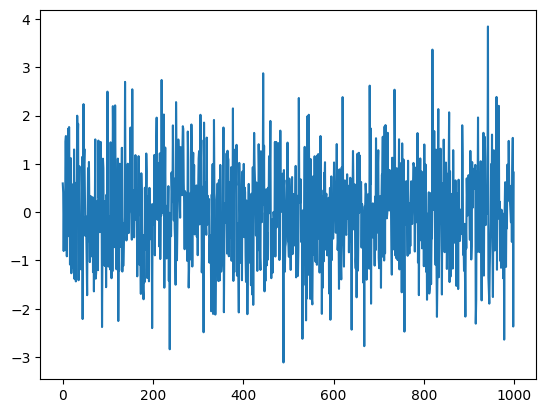

In [9]:
plt.plot(x, y) # 정상성 데이터는 그래프가 이렇게 그려져야 함 > 평균과 분산이 일정한 데이터 / trend, seasonalilty 없음

(array([  8.,  30., 123., 215., 268., 217., 101.,  29.,   7.,   2.]),
 array([-3.11286665, -2.41717016, -1.72147367, -1.02577717, -0.33008068,
         0.36561581,  1.0613123 ,  1.75700879,  2.45270528,  3.14840177,
         3.84409826]),
 <BarContainer object of 10 artists>)

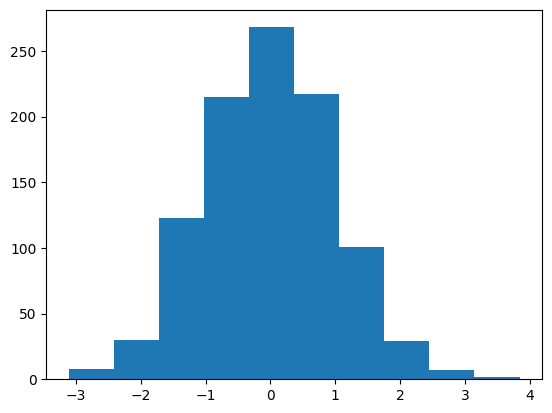

In [10]:
# historgram 그리면 좀 더 정확하게 알 수있음
plt.hist(y) # 평균을 기준으로 왼,오 비슷 > 분산이 일정하다..

## 비정상성 데이터

## 자기상관 데이터

<AxesSubplot: xlabel='Date'>

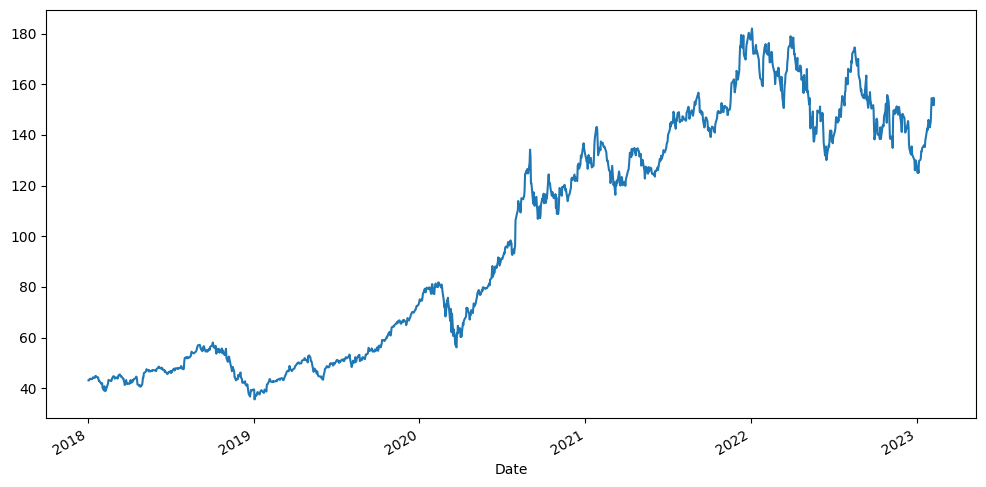

In [11]:
import FinanceDataReader as fdr

df = fdr.DataReader('AAPL', '2018')
df['Close'].plot(figsize = (12,6)) # 주가 데이터들은 전시점과 현시점 연관 대체적으로 있음 >> 자기 상관 데이터!

(array([294., 188., 103.,  50.,  19., 100., 160., 200.,  99.,  72.]),
 array([ 35.547501 ,  50.1937504,  64.8399998,  79.4862492,  94.1324986,
        108.778748 , 123.4249974, 138.0712468, 152.7174962, 167.3637456,
        182.009995 ]),
 <BarContainer object of 10 artists>)

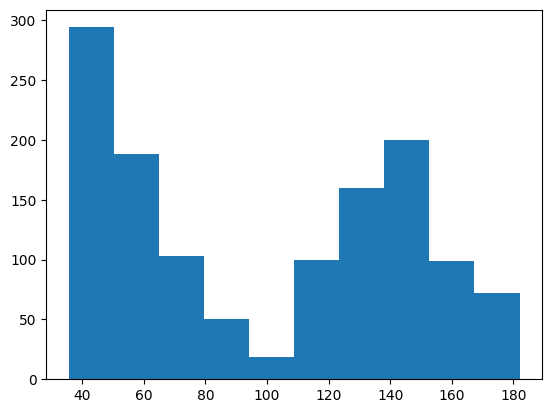

In [12]:
plt.hist(df['Close'])

## Trend
- 트렌드 데이터

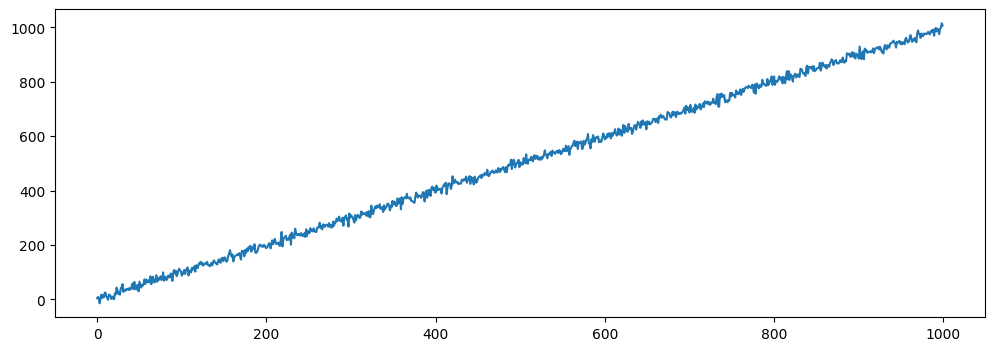

In [15]:
trend_data = np.array(list(range(0, 1000)))
noise = np.random.normal(0, 10, 1000)
trend_data_noise = trend_data + noise

plt.figure(figsize = (12,4))
plt.plot(trend_data_noise)

## 여러개의 분산을 가지는 데이터

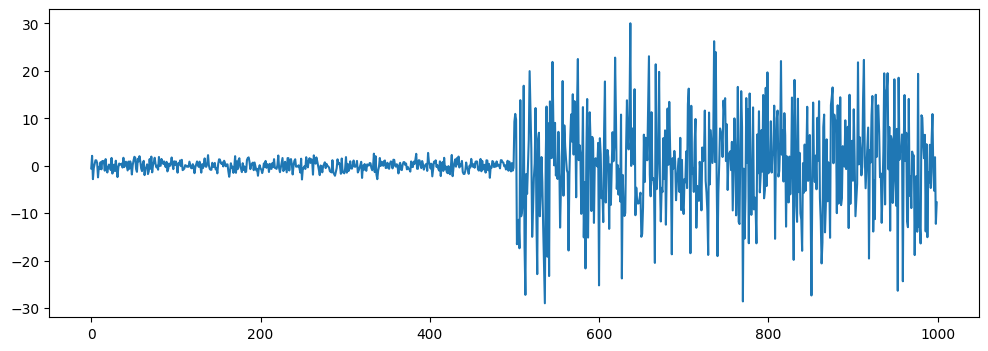

In [20]:
value1 = np.random.normal(scale = 1, size = 500)
value2 = np.random.normal(scale = 10, size = 500)
data = np.append(value1, value2)

plt.figure(figsize=(12,4))
plt.plot(data)

## 계절성을 가지는 데이터
- 주기성을 가지므로 정상성하지 않음

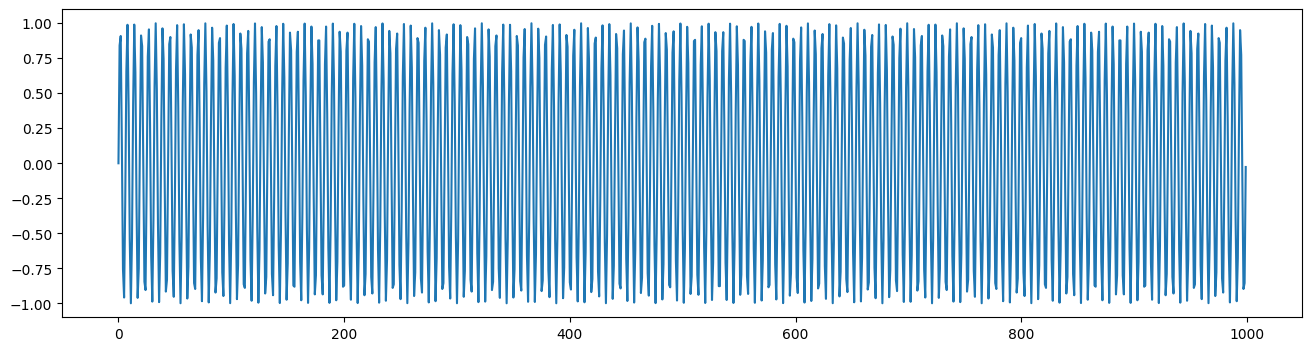

In [23]:
seasonality = np.sin(x) # cos도

plt.figure(figsize=(16,4))
plt.plot(seasonality)

## 트렌드 + 계절성을 가지는 데이터

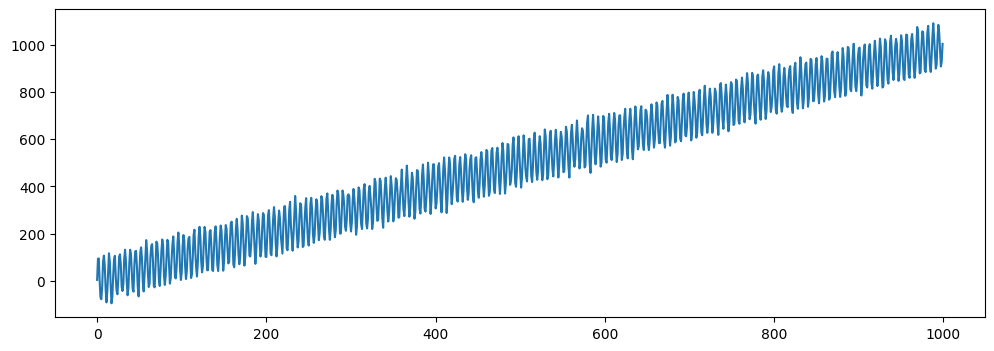

In [25]:
trend_seasonality = trend_data_noise + seasonality*100 # seasonality를 좀 더 강하게 해줌 . 그래야 더 튈거같아서

plt.figure(figsize=(12,4))
plt.plot(trend_seasonality)

## 추세 전환 데이터(국면 전환)

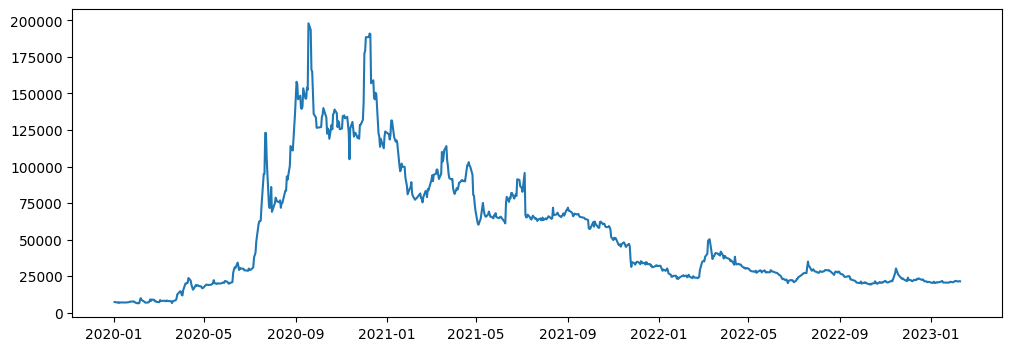

In [26]:
regime_changes_data = fdr.DataReader('019170', '2020')['Close']

plt.figure(figsize=(12,4))
plt.plot(regime_changes_data)

# 차분으로 정상성하게 만들기

<AxesSubplot: xlabel='Date'>

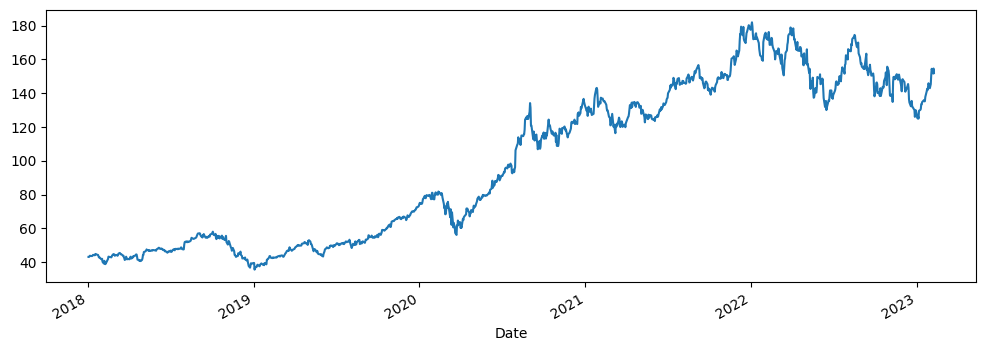

In [29]:
df['Close'].plot(figsize=(12,4))

<AxesSubplot: ylabel='Frequency'>

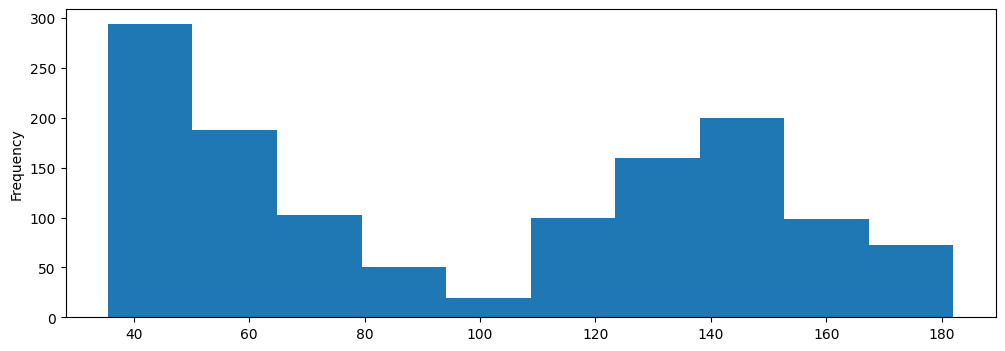

In [30]:
df['Close'].plot.hist(figsize=(12,4))

<AxesSubplot: ylabel='Frequency'>

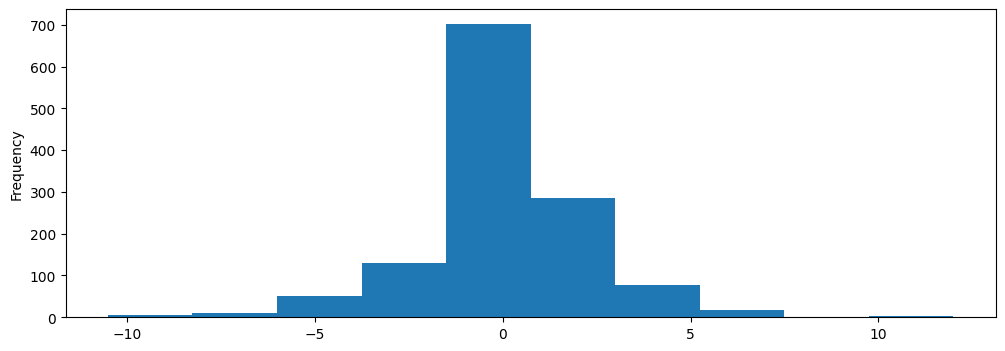

In [31]:
df['Close'].diff().plot.hist(figsize=(12,4)) # 이전에 비해서 훨신 일정해짐. 차분하니까

## pandas 자기상관 plot
- 판다스에서 제공하는거임

In [32]:
from pandas.plotting import autocorrelation_plot

In [ ]:
# 정상성을 가지는지 가지지 않는지를 볼 수 있음 > 자기상관성이 일정한가

In [34]:
df['Close'].diff().dropna().values

array([-0.0075  ,  0.200001,  0.4925  , ..., -2.770004,  2.919998,
       -2.729996])

(-0.15, 0.15)

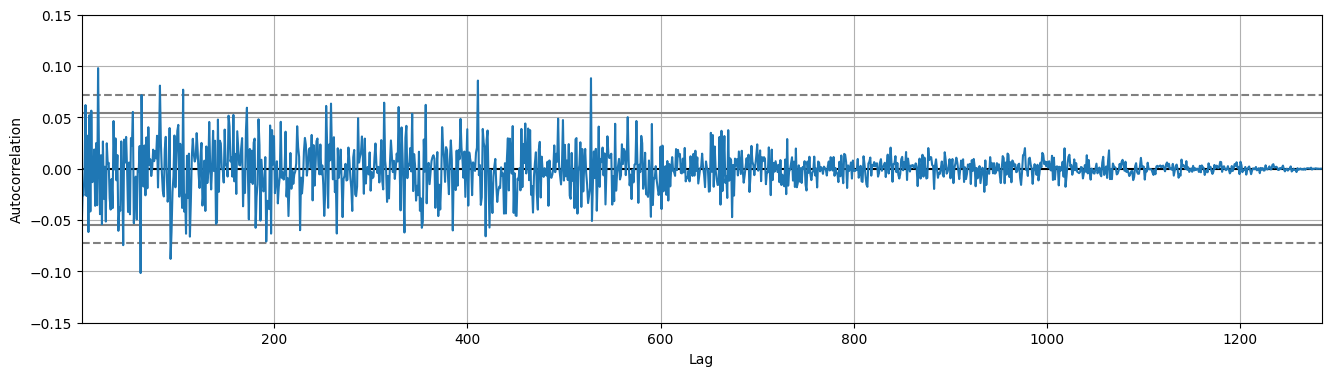

In [37]:
# 차분한 데이터 > 점선이 99%, 실선이 95%.. (신뢰성..) > 일정한 자기상관도를 가진다(99%넘는게 아예 없으면 좋겠죠?!) > 자기상관도가 크다 = 전날 주가에 영향을 많이 받았다
plt.figure(figsize=(16,4))
ax = autocorrelation_plot(df['Close'].diff().dropna())
ax.set_ylim([-0.15, 0.15])

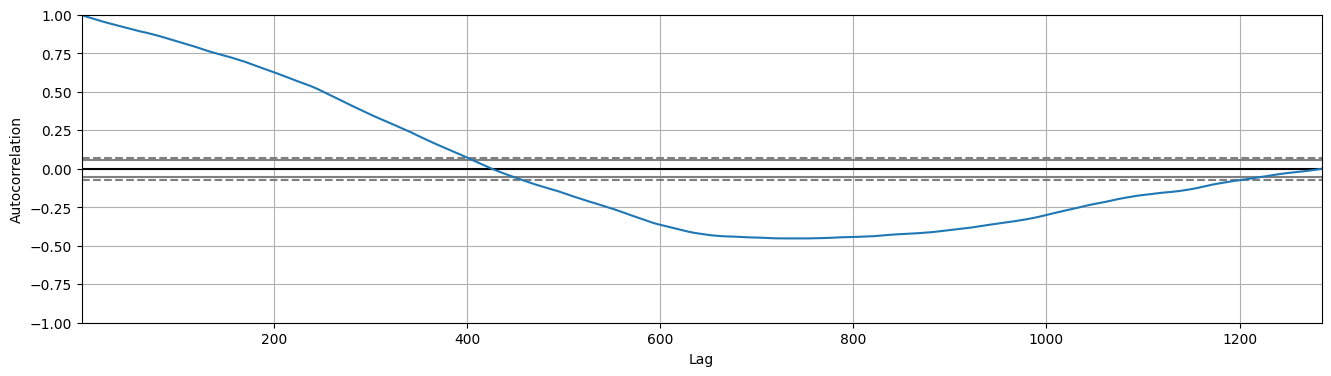

In [38]:
# 차분 전 데이터 > 자기 상관성을 터무니없이 완전 벗어남 > 자기상관성이 일정하다고 볼 수 없음
plt.figure(figsize=(16,4))
ax = autocorrelation_plot(df['Close'])

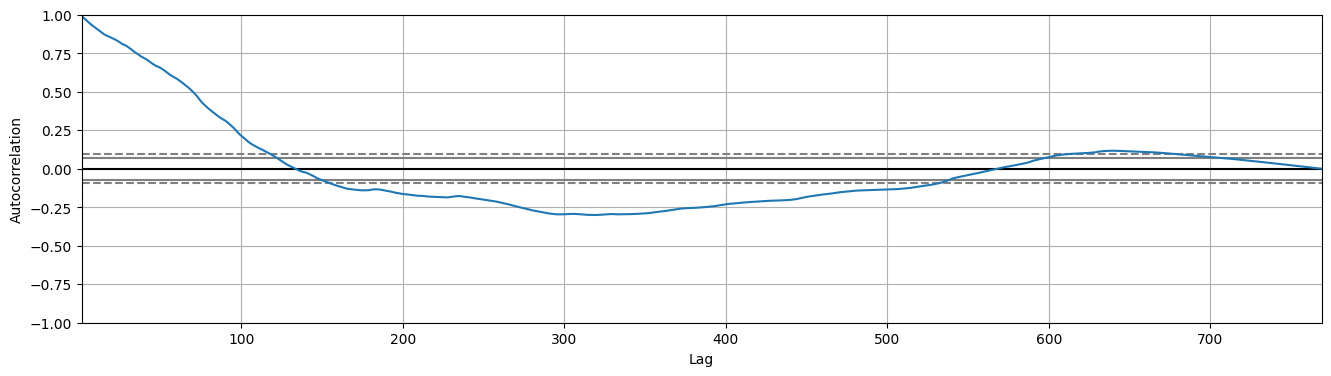

In [39]:
# 국면전환 데이터
plt.figure(figsize=(16,4))
ax = autocorrelation_plot(regime_changes_data)

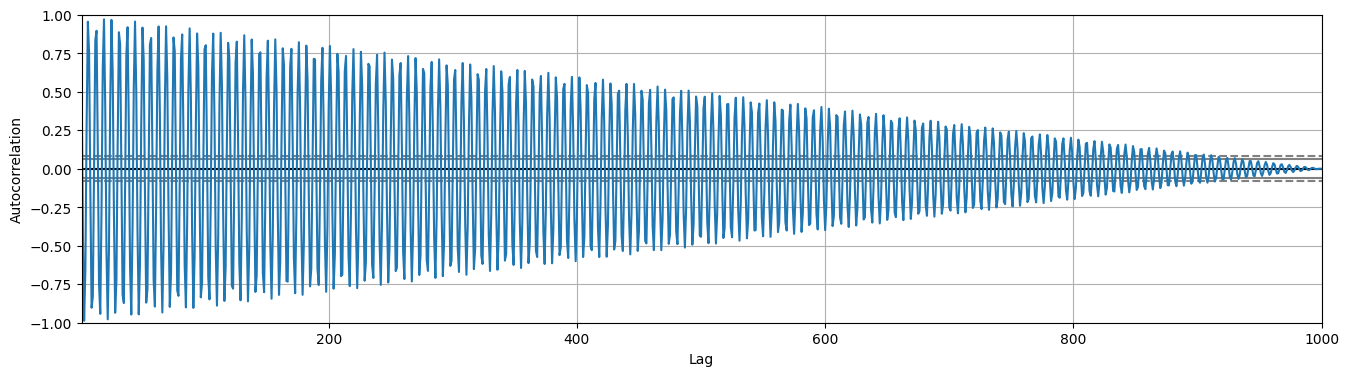

In [40]:
# 계절성
plt.figure(figsize=(16,4))
ax = autocorrelation_plot(seasonality)

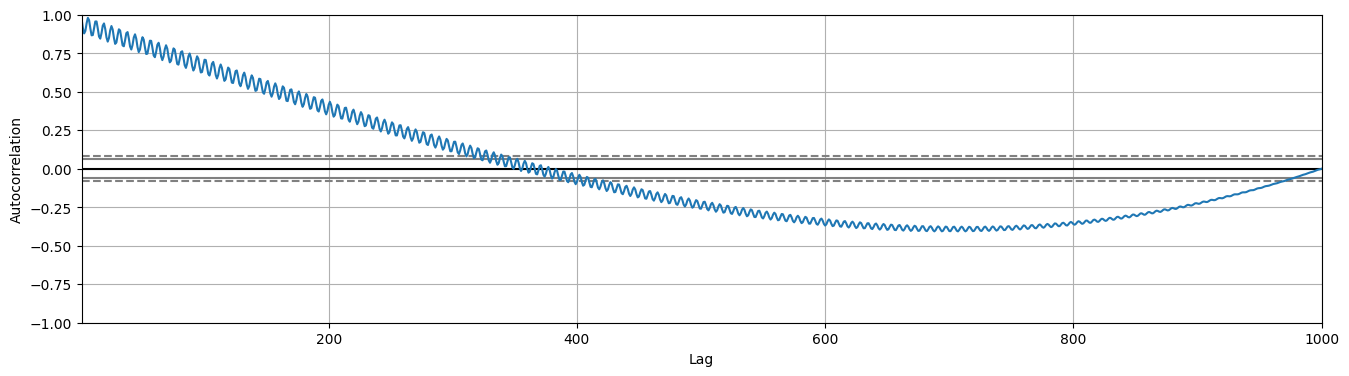

In [42]:
# 트렌드 + 계절성
plt.figure(figsize=(16,4))
ax = autocorrelation_plot(trend_seasonality)

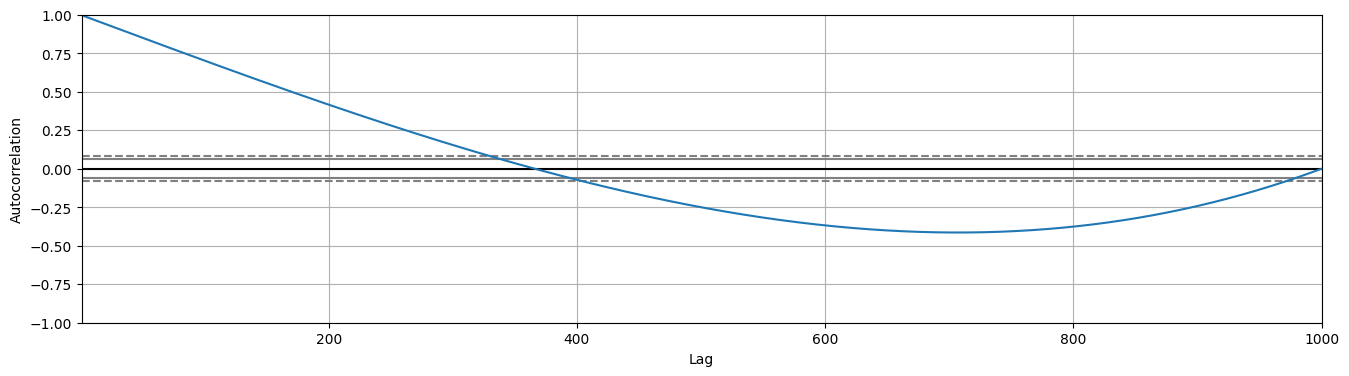

In [44]:
# 트렌드
plt.figure(figsize=(16,4))
ax = autocorrelation_plot(trend_data)

(-0.15, 0.15)

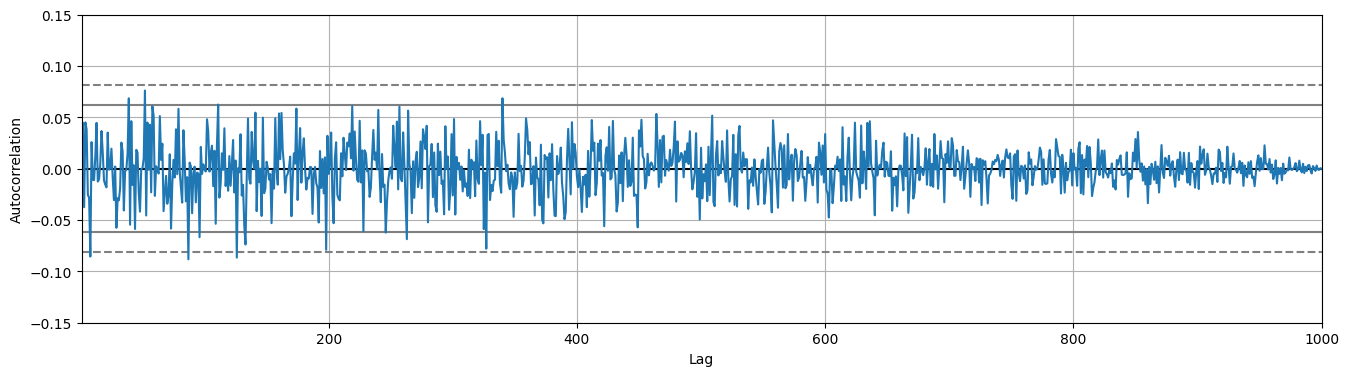

In [46]:
# 정상성 데이터
plt.figure(figsize=(16,4))
ax = autocorrelation_plot(y)
ax.set_ylim([-0.15, 0.15])